# MAE  evaluation plots

In [1]:
import numpy as np
import pandas as pd
import os

## Config path

In [26]:
BASE_PATH = '/root/work/datasets/artwork_sequence/'
RESULT_PATH = '/root/work/artwork_sequence/predicted_tours'
PLOT_PATH = '/root/work/artwork_sequence/plots'

In [4]:
def get_predicted_tour_path(window_index):
    predicted_tour_base_path = os.path.join(RESULT_PATH,'config_'+str(window_index))

    predicted_tour_path = {
        'sequence_most_similar' : os.path.join(predicted_tour_base_path,'generated_sequence_based_previous_most_similar'),
        'sequence_rnn' : os.path.join(predicted_tour_base_path,'generated_sequence_rnn')


    }

    return predicted_tour_path

In [5]:
window_indexes = [3, 4]

window_config = {}

for index in window_indexes:
    window_config[index] = get_predicted_tour_path(index)
    

## Load data

In [6]:
def load_mae_data(predicted_tour_path):
    #load data
    mae_dict = {}
    for key, value in predicted_tour_path.items():
        mae_dict[key] = pd.read_csv(os.path.join(value,'mae.csv'))
    
    #Add model name to the dataframe
    for key, df in mae_dict.items():
        df['model'] = key

    #Concat all dataframe in one to plot MAE
    df_mae = pd.concat(list(mae_dict.values()))
    df_mae = df_mae.reset_index(drop=False)

    return df_mae

In [7]:
window_mae = {}

for index, path in window_config.items():
    window_mae[index] = load_mae_data(path)

## Plot MAE

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

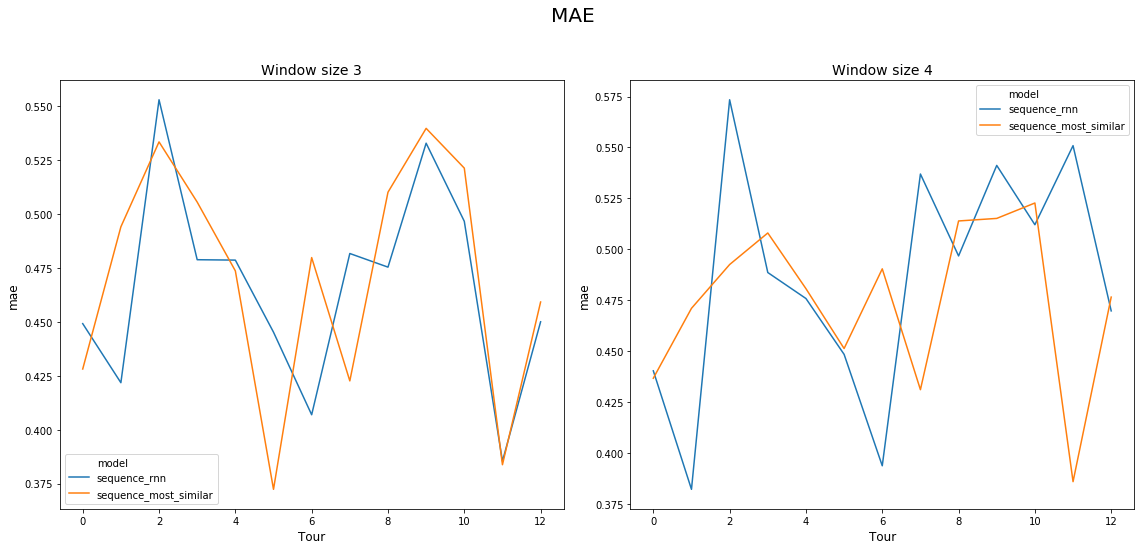

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

fig.suptitle('MAE', fontsize=20)

j= 0
for index, df_mae in window_mae.items():
    ax = sns.lineplot('index', 'mae', hue='model', data=df_mae, ax=axs[j])
    ax.set_title('Window size ' + str(index), fontdict={'fontsize': 14, 'fontweight': 'medium'} )
    ax.set_xlabel("Tour",fontsize=12)
    ax.set_ylabel("mae",fontsize=12)
    
    j+=1
    

fig.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

In [27]:
fig.savefig(os.path.join(PLOT_PATH,"mae_tour.png"), dpi=100)